In [1]:
import torch
x = torch.arange(12)
y = torch.zeros((1,2,3))
z = torch.tensor([[[1,2,3],[1,1,3],[3,2,4]]])

print(x)
print(x.shape)
print(x.numel())
print(y)
print(z.shape)
print(x.sum())
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
12
tensor([[[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([1, 3, 3])
tensor(66)


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [2]:
A = torch.arange(24).reshape((2,3,4))
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [19]:
A = torch.arange(30, dtype=torch.float32).reshape((5,3,2))
B = A.clone()
A, A+B
A * B

tensor([[[  0.,   1.],
         [  4.,   9.],
         [ 16.,  25.]],

        [[ 36.,  49.],
         [ 64.,  81.],
         [100., 121.]],

        [[144., 169.],
         [196., 225.],
         [256., 289.]],

        [[324., 361.],
         [400., 441.],
         [484., 529.]],

        [[576., 625.],
         [676., 729.],
         [784., 841.]]])

In [4]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [24]:
A = torch.arange(40,dtype=torch.float32).reshape(5,4,2)
sum_A = A.sum(dim = 1, keepdim=False)
sum_A

# sum_B = A.sum(dim = 1, keepdim=True)
# sum_B
# A
# A/sum_A

tensor([[ 12.,  16.],
        [ 44.,  48.],
        [ 76.,  80.],
        [108., 112.],
        [140., 144.]])

In [36]:
A.cumsum(dim=1)

tensor([[ 0.,  1.,  3.,  6.],
        [ 4.,  9., 15., 22.],
        [ 8., 17., 27., 38.],
        [12., 25., 39., 54.],
        [16., 33., 51., 70.]])

In [39]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x,y)
torch.sum(x*y)

tensor(6.)

In [40]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [41]:
B = torch.ones(4,3)
torch.mm(A,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [42]:
u = torch.tensor([3,-4.0])
torch.norm(u)

tensor(5.)

In [43]:
# F范数
torch.norm(torch.ones((4,9)))

tensor(6.)

In [15]:
import torch

x = torch.arange(4.0)
x.requires_grad_(True)
x.grad
y = 2 * torch.dot(x,x)
y
y.backward()
x.grad == 4 * x
x.grad.zero_() # 下划线表示的函数为重写内容
y = x.sum()
y.backward()
x.grad
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b *= 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

features: tensor([-0.5522, -1.4217]) 
label: tensor([7.9385])
tensor([[-0.5845,  0.3687],
        [ 1.2968,  0.1441],
        [-0.5192,  0.1344],
        [-1.0795, -0.5156],
        [-1.4090,  1.0456],
        [ 0.5480, -1.2068],
        [-0.2316, -0.6457],
        [-0.9815,  0.5714],
        [-0.5215,  0.8181],
        [-0.7152,  1.1052]]) 
 tensor([[ 1.7885],
        [ 6.3037],
        [ 2.7163],
        [ 3.7886],
        [-2.1763],
        [ 9.4031],
        [ 5.9285],
        [ 0.3017],
        [ 0.3920],
        [-0.9628]])


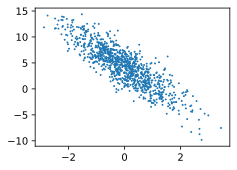

In [26]:
%matplotlib inline
import random
import torch
from torch.utils import data
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

true_w = torch.tensor([2, -3.4])
true_b = 4.2
# features, labels = synthetic_data(true_w, true_b, 1000)
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(), 1);

batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


In [27]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples,batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]
        
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
       
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

# for X,y in data_iter(batch_size, features, labels):
#     print(X, '\n', y)
#     break

[tensor([[-0.4219, -0.5161],
         [ 1.0166,  1.1663],
         [ 0.1940, -0.1018],
         [ 1.5285,  1.6485],
         [ 0.4376, -0.5193],
         [ 0.9785, -0.4167],
         [-0.7151, -0.8539],
         [ 0.4941,  1.4280],
         [-1.3398,  0.4425],
         [ 0.7790, -1.1083]]),
 tensor([[5.0894],
         [2.2544],
         [4.9363],
         [1.6453],
         [6.8503],
         [7.5768],
         [5.6750],
         [0.3227],
         [0.0299],
         [9.5219]])]

In [42]:
w = torch.normal(0, 0.1, size = (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad = True)


In [28]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [29]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [31]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


In [43]:
lr = 0.0001
num_epochs = 100
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean())}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 16.75690269470215
epoch 2, loss 16.410255432128906
epoch 3, loss 16.070817947387695
epoch 4, loss 15.73843765258789
epoch 5, loss 15.412968635559082
epoch 6, loss 15.094265937805176
epoch 7, loss 14.782187461853027
epoch 8, loss 14.476593971252441
epoch 9, loss 14.177352905273438
epoch 10, loss 13.884330749511719
epoch 11, loss 13.597396850585938
epoch 12, loss 13.316424369812012
epoch 13, loss 13.041289329528809
epoch 14, loss 12.771868705749512
epoch 15, loss 12.508045196533203
epoch 16, loss 12.249701499938965
epoch 17, loss 11.996720314025879
epoch 18, loss 11.748993873596191
epoch 19, loss 11.506407737731934
epoch 20, loss 11.268858909606934
epoch 21, loss 11.036240577697754
epoch 22, loss 10.808449745178223
epoch 23, loss 10.585386276245117
epoch 24, loss 10.366950988769531
epoch 25, loss 10.153046607971191
epoch 26, loss 9.943580627441406
epoch 27, loss 9.7384614944458
epoch 28, loss 9.537595748901367
epoch 29, loss 9.340897560119629
epoch 30, loss 9.14827728271484

In [29]:
from torch import nn
net = nn.Sequential(nn.Linear(2,1))

net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

loss = nn.MSELoss()

trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

num_epochs = 3
for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000184
epoch 2, loss 0.000099
epoch 3, loss 0.000099


In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root = "../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root = "../data", train=False, transform=trans, download=True)

len(mnist_train), len(mnist_test)

def get_fashion_minist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
                   'sneaker', 'Bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles = None, scale = 1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize = figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes,imgs)):
        ax.imshow(img.numpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return ax
               


tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0])


<Axes: title={'center': 't-shirt'}>

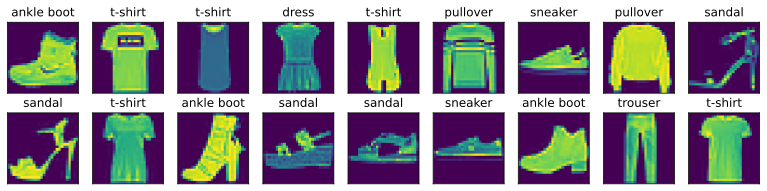

In [2]:
mnist_train[0][0].shape
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
print(y)
show_images(X.reshape(18,28,28), 2, 9, titles = get_fashion_minist_labels(y))

In [15]:
batch_size = 256

def get_dataloader_workers():
    return 6

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X, y in train_iter:
    continue

f'{timer.stop(): .2f} sec'

' 6.76 sec'

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = "../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root = "../data", train=False, transform=trans, download=True)

    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers = get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers = get_dataloader_workers()))

In [12]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [21]:
X = torch.tensor([[1.0,2.0,3.0], [4.0,5.0,6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True), X.shape

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]),
 torch.Size([2, 3]))

In [14]:
def softmax(X):
    exp_x = torch.exp(X)
    sum_x = exp_x.sum(1, keepdim=True)
    return exp_x / sum_x

X = torch.normal(0, 1, (2,5))
X_prob = softmax(X)
X_prob, X_prob.sum(1, keepdim=True)



(tensor([[0.0401, 0.3452, 0.3583, 0.0777, 0.1787],
         [0.0767, 0.0380, 0.2351, 0.0104, 0.6398]]),
 tensor([[1.0000],
         [1.0000]]))

In [15]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)


In [8]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]

def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat,y)


tensor([2.3026, 0.6931])

In [9]:
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis = 1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

In [17]:
class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n
    
    def add(self, *args):
        self.data = [a + float(b) for a,b in zip(self.data, args)]
    
    def reset(self):
        self.data = [0.0] * len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2) # 正确预测数、预测总数
    with torch.no_grad():
        for X,y in data_iter:
            metric.add(accuracy(net(X), y), y.numel()) # y.numel()样本总数
    return metric[0] / metric[1]

evaluate_accuracy(net, test_iter)


0.1368

In [4]:
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    
    return metric[0] / metric[2], metric[1] / metric[2]

class Animator:
    def __init__(self, xlabel = None, ylabel = None, legend = None, xlim = None,
                 ylim = None, xscale = 'linear', yscale = 'linear',
                 fmts = ('-', 'm--', 'g-', 'r:'), nrows = 1, ncols = 1,
                 figsize = (3.5, 2.5)):
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize = figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a,b) in enumerate(zip(x,y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['trian loss', 'train acc',' test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

lr = 0.1
def updater(batch_size):
    return d2l.sgd([W,b], lr, batch_size)

num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

NameError: name 'net' is not defined

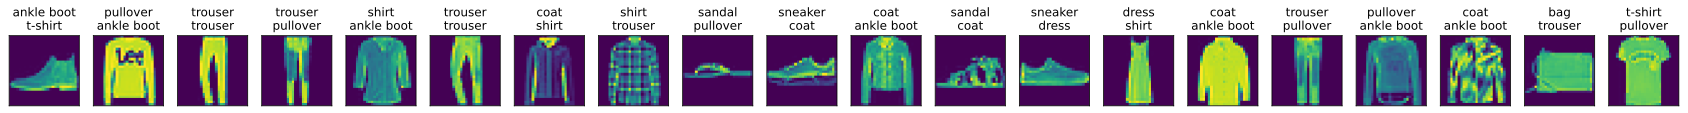

In [34]:
def predict_ch3(net, test_iter, n = 20):
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n,28,28)), 1, n, titles=titles[0:n]
    )

predict_ch3(net, test_iter)

In [12]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weight)
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

NameError: name 'train_ch3' is not defined

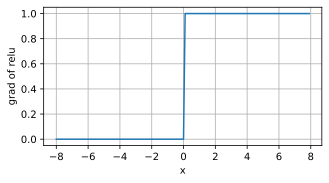

In [9]:
#matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)

d2l.plot(x.detach(), y.detach(), 'x','relu(x)', figsize=(5,2.5))

y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5,2.5))



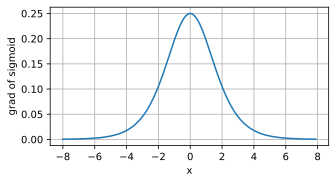

In [10]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5,2.5))
x.grad.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5,2.5))



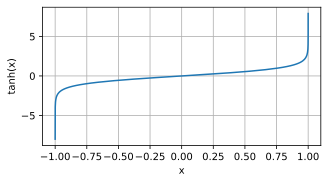

In [11]:
y = torch.tanh(x)
d2l.plot(y.detach(), x.detach(), 'x','tanh(x)', figsize=(5,2.5))



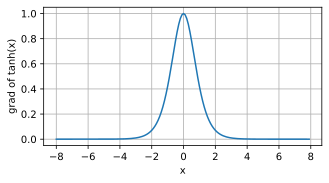

In [15]:
x.grad.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh(x)', figsize=(5,2.5))

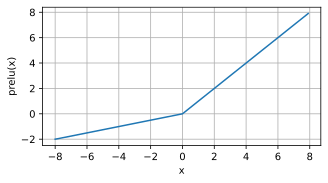

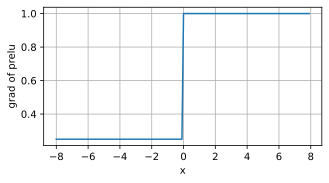

In [16]:
import torch
from d2l import torch as d2l

# 1. 可学习参数 α，初始值 0.25
alpha = torch.tensor(0.25, requires_grad=True)

# 2. 输入
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)

# 3. 手写 pReLU
def prelu(x, a):
    return torch.where(x >= 0, x, a * x)

y = prelu(x, alpha)

# 4. 计算梯度（上游梯度设 1，得到 dy/dx）
y.backward(torch.ones_like(x), retain_graph=True)   # x.grad 里存导数
grad = x.grad.clone()          # 备份，防止被后续覆盖

# 5. 画图
d2l.plot(x.detach(), y.detach(), 'x', 'prelu(x)', figsize=(5, 2.5))
d2l.plt.show()
d2l.plot(x.detach(), grad.detach(), 'x', 'grad of prelu', figsize=(5, 2.5))
d2l.plt.show()

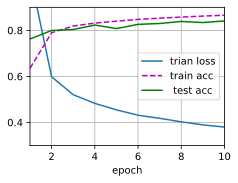

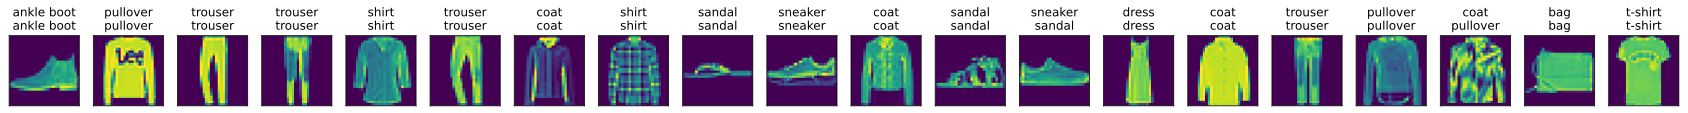

In [23]:
import torch
from torch import nn
from d2l import torch as d2l
from IPython import display


class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n
    
    def add(self, *args):
        self.data = [a + float(b) for a,b in zip(self.data, args)]
    
    def reset(self):
        self.data = [0.0] * len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1,b1,W2,b2]

def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis = 1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

def net(X):
    X = X.reshape(-1, num_inputs)
    H = relu(X@W1 + b1)
    return (H@W2 + b2)

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['trian loss', 'train acc',' test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc


def predict_ch3(net, test_iter, n = 20):
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n,28,28)), 1, n, titles=titles[0:n]
    )
    
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2) # 正确预测数、预测总数
    with torch.no_grad():
        for X,y in data_iter:
            metric.add(accuracy(net(X), y), y.numel()) # y.numel()样本总数
    return metric[0] / metric[1]


loss = nn.CrossEntropyLoss(reduction='none')

num_epochs, lr = 10, 0.10
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)
predict_ch3(net, test_iter)

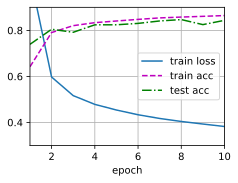

: 

In [ ]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    
net.apply(init_weights)

batch_size, lr, num_epochs = 256, 0.1, 10

loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)



weight: [[3.61024   3.3757539]]


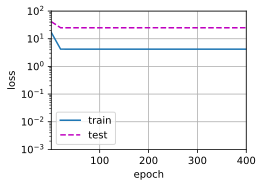

In [13]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

def evaluate_loss(net, data_iter, loss): #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2) # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',xlim=[1, num_epochs], ylim=[1e-3, 1e2],legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())


max_degree = 20 # 多项式的最大阶数
n_train, n_test = 100, 100 # 训练和测试数据集大小
true_w = np.zeros(max_degree) # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]
features[:2],poly_features[:2, :], labels[:2]
train(poly_features[:n_train, :2], poly_features[n_train:, :2],labels[:n_train], labels[n_train:])